# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

In [2]:
data = r"C:\Users\Rutuja Salunke\Downloads\archive (31)\games.csv"
df = pd.read_csv(data)
df



,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [3]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

# EDA

## Display the first few rows to understand the structure

In [4]:
df.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Check basic statistics

In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


## Check shape of data

In [6]:
df.shape

(20058, 16)

## Check info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


## Check for null values

In [8]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


# Feature Engineering

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L=LabelEncoder()
df["id"]=L.fit_transform(df["id"])


In [11]:
df["rated"]=L.fit_transform(df["rated"])
df["victory_status"]=L.fit_transform(df["victory_status"])
df["winner"]=L.fit_transform(df["winner"])
df["increment_code"]=L.fit_transform(df["increment_code"])
df["white_id"]=L.fit_transform(df["white_id"])
df["black_id"]=L.fit_transform(df["black_id"])
df["moves"]=L.fit_transform(df["moves"])
df["opening_eco"]=L.fit_transform(df["opening_eco"])
df["opening_name"]=L.fit_transform(df["opening_name"])

## Check for outliers

<Axes: >

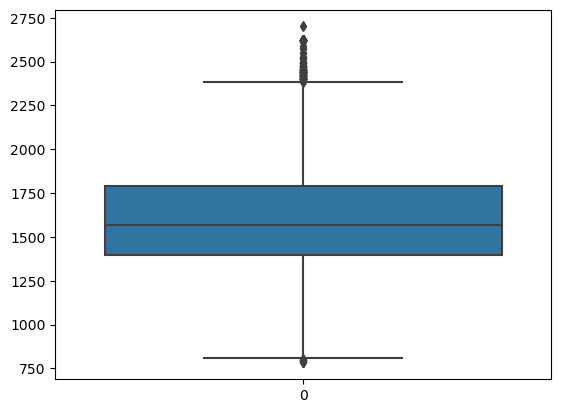

In [12]:
sns.boxplot(df["white_rating"])


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

id                   0
rated             3903
created_at        1939
last_move_at      1939
turns              428
victory_status       0
winner               0
increment_code       0
white_id             0
white_rating       135
black_id             0
black_rating        91
moves                0
opening_eco          0
opening_name         0
opening_ply        899
dtype: int64


## Handle Outliers

In [14]:
def find_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_tail = q1 - 1.5 * iqr
        upper_tail = q3 + 1.5 * iqr
        df[col] = np.where(df[col] > upper_tail, upper_tail, np.where(df[col] < lower_tail, lower_tail, df[col]))
n = ['rated', 'created_at', 'last_move_at', 'turns', 'white_rating', 'black_rating', 'opening_ply']
find_iqr(df, n)


### Explore general trends of 'White' players against 'Black' players

In [15]:
white_vs_black = df['winner'].value_counts()
print("White vs Black Wins:\n", white_vs_black)


White vs Black Wins:
 2    10001
0     9107
1      950
Name: winner, dtype: int64


### Visualize the distribution of winner colors

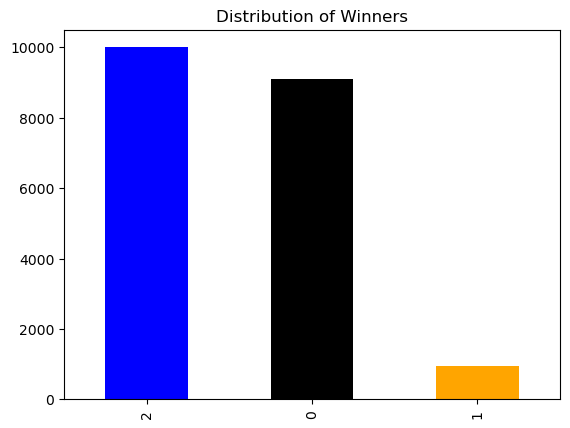

In [16]:
df['winner'].value_counts().plot(kind='bar', color=['blue', 'black','orange'])
plt.title('Distribution of Winners')
plt.show()
# 2:white,0:black,1:draw

### Any trend of winners with respect to turns and match time?

In [17]:
df['match_time'] =pd.to_datetime(df["last_move_at"]) - pd.to_datetime(df["created_at"])

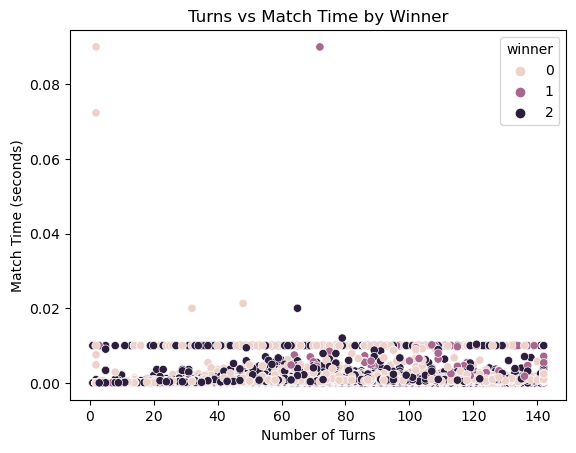

In [18]:
# Convert 'match_time' to numerical format 
df['match_time_numeric'] = df['match_time'].dt.total_seconds()

sns.scatterplot(x='turns', y='match_time_numeric', hue='winner', data=df)
plt.title('Turns vs Match Time by Winner')
plt.xlabel('Number of Turns')
plt.ylabel('Match Time (seconds)')
plt.show()


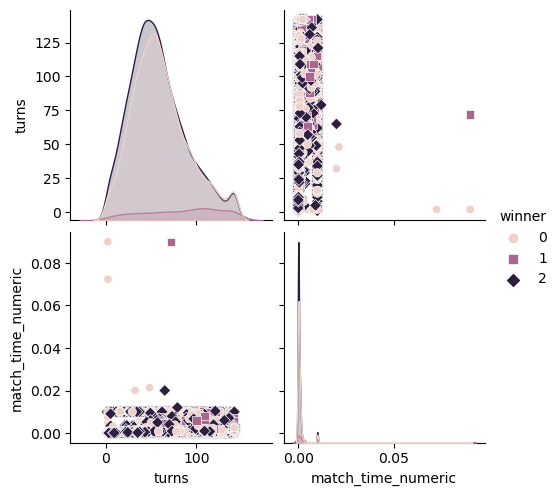

In [19]:
columns = ['turns', 'match_time_numeric', 'winner']
df1 = df[columns]
sns.pairplot(df1, hue='winner', markers=["o", "s", "D"])
plt.show()


### Create a count plot for openings with respect to rank and color

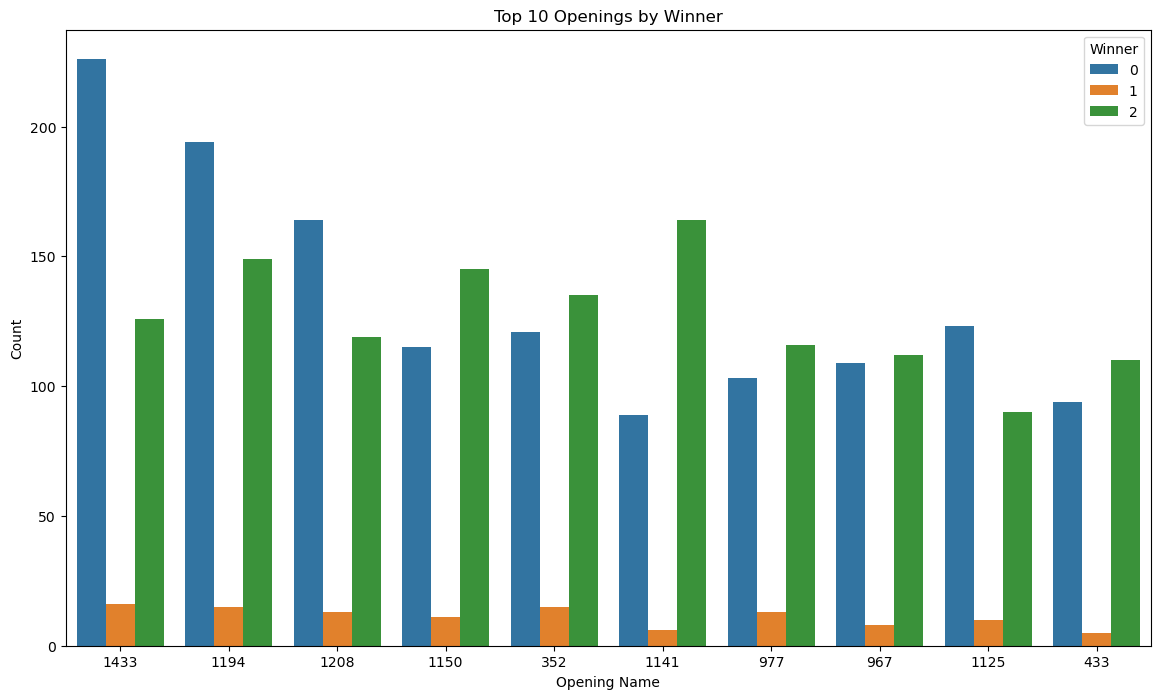

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x='opening_name', hue='winner', data=df, order=df['opening_name'].value_counts().index[:10])

plt.title('Top 10 Openings by Winner')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.legend(title='Winner')
plt.show()


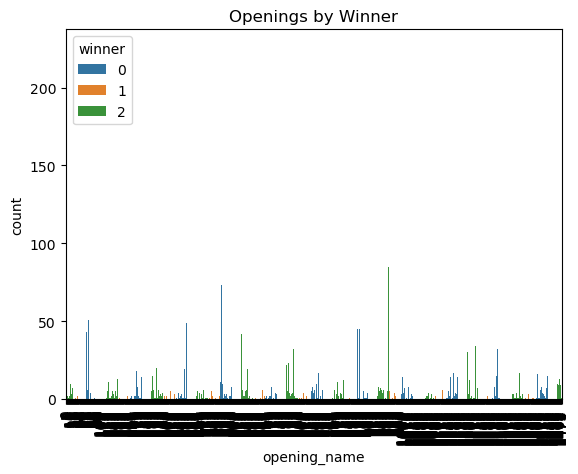

In [21]:
# Visualize the most common openings used by players of different ranks and colors
sns.countplot(x='opening_name', hue='winner', data=df)
plt.xticks(rotation=90)
plt.title('Openings by Winner')
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
df1=df.drop(['winner',"match_time_numeric","created_at","last_move_at","match_time"],axis=1)
df1

,id,rated,turns,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,9068,1.0,13.0,2,110,1287,1500.0,11,1191.0,4524,248,1387,5.0
1,14512,1.0,16.0,3,298,16,1322.0,7748,1261.0,1987,71,750,4.0
2,14904,1.0,61.0,1,298,3823,1496.0,11,1500.0,16383,171,650,3.0
3,14350,1.0,61.0,1,187,2017,1439.0,134,1454.0,3770,241,992,3.0
4,3091,1.0,95.0,1,247,6056,1523.0,134,1469.0,15622,192,783,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,4563,1.0,24.0,3,21,1079,1691.0,4046,1220.0,6118,61,191,2.0
20054,9954,1.0,82.0,1,19,3921,1233.0,2855,1196.0,5421,37,960,2.0
20055,18757,1.0,35.0,1,19,3921,1219.0,7464,1286.0,3431,239,977,3.0
20056,11344,1.0,109.0,3,19,5235,1360.0,4046,1227.0,11217,78,806,4.0


In [24]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
Std = StandardScaler()
Standard_array = Std.fit_transform(df1)
Df_Std = pd.DataFrame(Standard_array, columns = df1.columns)
Df_Std.head()

,id,rated,turns,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,-0.086163,0.0,-1.459909,-0.147919,-0.119242,-1.239844,-0.331823,-1.703127,-1.371836,-0.905163,1.262439,1.495002,0.110796
1,0.900209,0.0,-1.366800,0.837779,1.387175,-1.701359,-0.947142,1.128891,-1.130184,-1.370147,-0.811261,-0.055650,-0.288011
2,0.971233,0.0,0.029840,-1.133616,1.387175,-0.318993,-0.345651,-1.703127,-0.305117,1.268367,0.360321,-0.299081,-0.686818
3,0.870857,0.0,0.029840,-1.133616,0.497748,-0.974773,-0.542691,-1.658105,-0.463917,-1.043357,1.180428,0.533451,-0.686818
4,-1.169106,0.0,1.085080,-1.133616,0.978519,0.491835,-0.252316,-1.658105,-0.412135,1.128890,0.606353,0.024682,0.110796


# model Training

In [25]:
x=df1
y=df['winner']

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [27]:
df["winner"].unique()

array([2, 0, 1])

In [28]:
log_reg=LogisticRegression(multi_class="ovr")
log_reg

LogisticRegression(multi_class='ovr')

In [29]:
log_reg_model=log_reg.fit(xtrain,ytrain)
log_reg_model

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [30]:
ytrain_predict=log_reg_model.predict(xtrain)

## Model Evaluation

In [31]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,ytrain_predict)
print(class_report)
print()

Accuracy : 0.6193019943019943

              precision    recall  f1-score   support

           0       0.62      0.59      0.60      6374
           1       0.00      0.00      0.00       687
           2       0.62      0.71      0.66      6979

    accuracy                           0.62     14040
   macro avg       0.41      0.43      0.42     14040
weighted avg       0.59      0.62      0.60     14040




C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#Testing
ytest_predict = log_reg_model.predict(xtest)
ytest_predict

array([0, 2, 0, ..., 0, 0, 2])

In [33]:
accuracy = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,ytest_predict))
print()

Accuracy : 0.6319375207710203

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      2733
           1       0.00      0.00      0.00       263
           2       0.64      0.72      0.68      3022

    accuracy                           0.63      6018
   macro avg       0.42      0.44      0.43      6018
weighted avg       0.60      0.63      0.62      6018




C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision tree

In [34]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [35]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [36]:
ytrain_pred1=dt_model.predict(xtrain)

In [37]:
accuracy = accuracy_score(ytrain,ytrain_pred1)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,ytrain_pred1)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6374
           1       1.00      1.00      1.00       687
           2       1.00      1.00      1.00      6979

    accuracy                           1.00     14040
   macro avg       1.00      1.00      1.00     14040
weighted avg       1.00      1.00      1.00     14040




In [38]:
#Testing
y_pred_test1 = dt_model.predict(xtest)
y_pred_test1

array([2, 0, 2, ..., 2, 0, 0])

In [39]:
accuracy = accuracy_score(ytest,y_pred_test1)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_pred_test1))
print()

Accuracy : 0.6247922897972749

              precision    recall  f1-score   support

           0       0.59      0.58      0.58      2733
           1       0.97      0.96      0.97       263
           2       0.63      0.64      0.63      3022

    accuracy                           0.62      6018
   macro avg       0.73      0.73      0.73      6018
weighted avg       0.62      0.62      0.62      6018




In [40]:
hyperparameters=hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
} 

In [41]:
random_search_model  = RandomizedSearchCV(dt_model,hyperparameters,error_score='raise',cv=5)
random_search_model

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [42]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [43]:
random_search_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7)

In [44]:
hyp_dt_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=6)

In [45]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6)

In [46]:
yt_predict=hyp_dt_model.predict(xtrain)
yt_predict

array([0, 2, 0, ..., 2, 0, 0])

In [47]:
accuracy = accuracy_score(ytrain,yt_predict)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,yt_predict)
print(class_report)
print()

Accuracy : 0.6933760683760684

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      6374
           1       1.00      0.95      0.98       687
           2       0.71      0.66      0.68      6979

    accuracy                           0.69     14040
   macro avg       0.79      0.77      0.78     14040
weighted avg       0.70      0.69      0.69     14040




In [48]:
ytest_predict1 = hyp_dt_model.predict(xtest)

In [49]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,ytest_predict1))
print()

Accuracy : 0.6419076105018279

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      2733
           1       1.00      0.96      0.98       263
           2       0.66      0.61      0.63      3022

    accuracy                           0.64      6018
   macro avg       0.75      0.74      0.74      6018
weighted avg       0.64      0.64      0.64      6018




## Random Forest

In [50]:
Random_model=RandomForestClassifier()
Random_model

RandomForestClassifier()

In [51]:
Random_model_reg=Random_model.fit(xtrain,ytrain)
Random_model_reg

RandomForestClassifier()

In [52]:
y_pred=Random_model_reg.predict(xtrain)
y_pred

array([0, 0, 2, ..., 0, 2, 0])

In [53]:
accuracy = accuracy_score(ytrain,y_pred)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,y_pred)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6374
           1       1.00      1.00      1.00       687
           2       1.00      1.00      1.00      6979

    accuracy                           1.00     14040
   macro avg       1.00      1.00      1.00     14040
weighted avg       1.00      1.00      1.00     14040




In [54]:
y_test_predict = Random_model_reg.predict(xtest)

In [55]:
accuracy = accuracy_score(ytest,y_test_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_test_predict))
print()

Accuracy : 0.6879361914257228

              precision    recall  f1-score   support

           0       0.66      0.63      0.65      2733
           1       1.00      0.96      0.98       263
           2       0.68      0.71      0.70      3022

    accuracy                           0.69      6018
   macro avg       0.78      0.77      0.78      6018
weighted avg       0.69      0.69      0.69      6018




In [56]:
hyperparameters=hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
    "max_features" : np.arange(2,10),
    
} 

In [57]:
random_search_model  = RandomizedSearchCV(Random_model_reg,hyperparameters,cv=5)
random_search_model

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [58]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [59]:
random_search_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=7,
                       min_samples_leaf=4, min_samples_split=6)

In [60]:
hyp_dt_model1 = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=4,
                       min_samples_leaf=2, min_samples_split=6)

In [61]:
hyp_dt_model1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=4,
                       min_samples_leaf=2, min_samples_split=6)

In [62]:
yt_predict1=hyp_dt_model.predict(xtrain)
yt_predict1

array([0, 2, 0, ..., 2, 0, 0])

In [63]:
accuracy = accuracy_score(ytrain,y_pred)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,y_pred)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6374
           1       1.00      1.00      1.00       687
           2       1.00      1.00      1.00      6979

    accuracy                           1.00     14040
   macro avg       1.00      1.00      1.00     14040
weighted avg       1.00      1.00      1.00     14040




In [64]:
y_test_predict1 = hyp_dt_model.predict(xtest)

In [65]:
accuracy = accuracy_score(ytest,y_test_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_test_predict))
print()

Accuracy : 0.6879361914257228

              precision    recall  f1-score   support

           0       0.66      0.63      0.65      2733
           1       1.00      0.96      0.98       263
           2       0.68      0.71      0.70      3022

    accuracy                           0.69      6018
   macro avg       0.78      0.77      0.78      6018
weighted avg       0.69      0.69      0.69      6018




In [66]:
df1.columns

Index(['id', 'rated', 'turns', 'victory_status', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco',
       'opening_name', 'opening_ply'],
      dtype='object')

In [67]:
class Linear_reg():
    def Input(self):
        self.id = int(input("Enter id: "))
        self.rated = float(input("Enter rated: "))
        self.turns = float(input("Enter turns: "))
        self.victory_status = float(input("Enter victory_status: "))
        self.increment_code = float(input("Enter increment_code: "))
        self.white_id = float(input("Enter white_id: "))
        self.white_rating = int(input("Enter white_rating: "))
        self.black_id = float(input("Enter black_id: "))
        self.black_rating = float(input("Enter black_rating: "))
        self.moves = float(input("Enter moves: "))
        self.opening_eco = float(input("Enter opening_eco: "))
        self.opening_name = float(input("Enter opening_name: "))
        self.opening_ply = float(input("Enter opening_ply: "))
    def Output(self):
        df = pd.DataFrame([[self.id, self.rated,self.turns, self.victory_status,self.increment_code, self.white_id,self.white_rating,self.black_id,self.black_rating,self.moves,self.opening_eco,self.opening_name,self.opening_ply]], columns=['id', 'rated', 'turns', 'victory_status', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco',
       'opening_name', 'opening_ply'])
        return hyp_dt_model1.predict(df)


In [68]:
p=Linear_reg()

In [73]:
p.Input()

Enter id: 5
Enter rated: 5
Enter turns: 5
Enter victory_status: 5
Enter increment_code: 5
Enter white_id: 5
Enter white_rating: 5
Enter black_id: 5
Enter black_rating: 5
Enter moves: 5
Enter opening_eco: 5
Enter opening_name: 5
Enter opening_ply: 5


In [74]:
p.Output()

array([2])

In [75]:
import pickle
with open('chess_winner_predictor_model.pkl', 'wb') as model_file:
    pickle.dump(Random_model_reg, model_file)


In [76]:
# Load the saved model from the pickle file
with open('chess_winner_predictor_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [78]:
# Assuming 'input_data' is a DataFrame with input values
predictions = loaded_model.predict(x)


In [79]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.json  # Assuming input data is sent as JSON
    predictions = loaded_model.predict(input_data)
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
